# Day 11.5 - Support Vector Machines (RBF Kernel)
## Oct. 15, 2020

<img src="./images/cmse.png"
     alt="CMSE logo"
     style="float: right; margin-left: 50px; width: 600px;" />

# Administrative

* **Midterm** will be given Thursday 10/29 in class
    * Focus on classification problems (More details on Tuesday; review sheet)
    * Read data, clean data, filter data, standardize data, model data, evaluate model with plots
    * Open book, note, internet - no chatting with other students
* **Changing groups**: After the midterm we will put you in new groups for the rest of the semester.
    * We will try to keep you with at least one other person from your current group.
* Please complete this MidSemester survey: [www.egr.msu.edu/mid-semester-evaluation](https://www.egr.msu.edu/mid-semester-evaluation)
* **Homework 2** is graded; people did rather well. Well done!!!

# From Pre-Class Assignment


## Useful bits

* Making the data was relatively straightforward
* I was reminded about how to make a 3D plot and got it working

## Challenging bits

* I was not able to make the 3D plot
* I don't quite understand what the SVM is doing when it makes dimensions
* I was unable to separate the ciruclar data

# Reminder of the ML Paradigm

<img src="./images/ML_paradigm.png" width=600px/>

**We do not expect you in this class to learn every detail of the models.**

# Support Vector Machines

* As a classifier, an SVM creates new dimensions from the original data, to be able to seperate the groups along the original features as well as any created dimensions. 
* The kernel that we choose tells us what constructed dimensions are available to us. 
* We will start with a linear kernel, which tries to construct hyper-planes to seperate the data.
    * For 2D, linearly separable data, this is just a line.
    
* **We are now going to use a new kernel: RBF**, this will create new dimensions that aren't linear. You do not need to know the details of how this works (that is for later coursework).

**We use `make_circles` because it gives us control over the data and it's separation; we don't have to clean or standardize it.**

## Let's make some circles

Text(0, 0.5, '$x_1$')

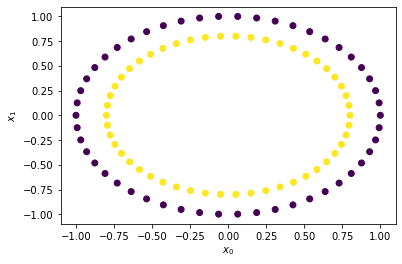

In [6]:
##imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

X,y = make_circles(n_samples = 100, random_state = 3)

## Plot Circles
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(r'$x_0$'); plt.ylabel(r'$x_1$')

## Let's look at the data in 3D

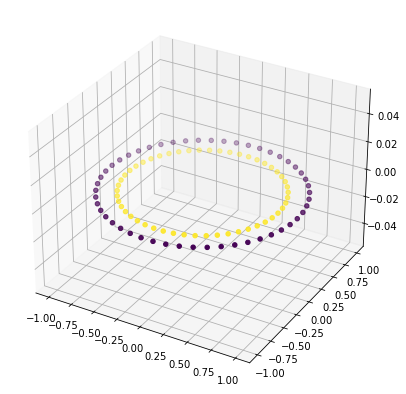

In [9]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X[:,0], X[:,1], 0, c=y)

## Let's make a little more data

Text(0, 0.5, '$x_1$')

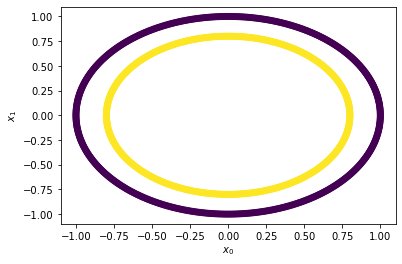

In [10]:
X,y = make_circles(n_samples = 1000, random_state = 3)

## Plot Blobs
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(r'$x_0$'); plt.ylabel(r'$x_1$')

## Let's train up a linear SVM
* This is what we did last class; but now we have split the data

In [12]:
## Split the data
train_vectors, test_vectors, train_labels, test_labels = train_test_split(X, y, test_size=0.25)

## Fit with a linear kernel
cls = SVC(kernel="linear", C=10)
cls.fit(train_vectors,train_labels)

## Print the accuracy
print('Accuracy: ', cls.score(test_vectors, test_labels))

Accuracy:  0.44


## Let's check the report and confusion matrix
* We want more details than simply accuracy

In [14]:
## Use the model to predict
y_pred = cls.predict(test_vectors)

print("Classification Report:\n", classification_report(test_labels, y_pred))

print("Confusion Matrix:\n", confusion_matrix(test_labels, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.43      0.44       129
           1       0.43      0.45      0.44       121

    accuracy                           0.44       250
   macro avg       0.44      0.44      0.44       250
weighted avg       0.44      0.44      0.44       250

Confusion Matrix:
 [[55 74]
 [66 55]]


## Let's look at the ROC curve and compute the AUC

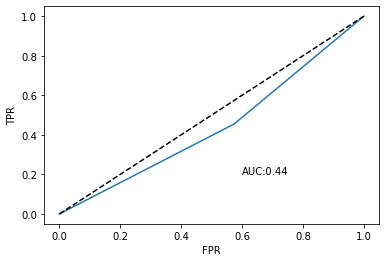

In [15]:
## Construct the ROC and the AUC
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
auc = np.round(roc_auc_score(test_labels, y_pred),3)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.text(0.6,0.2, "AUC:"+str(auc));

## The Linear Kernel Absolutely Failed!

### Let's use RBF instead and see what happens

1. Train the model
2. Test the model
3. Evalaute the model: accuracy, scores, confusion matrix, ROC, AUC

## Train the model and start evaluating it

In [16]:
## Fit with a RBF kernel
cls_rbf = SVC(kernel="rbf", C=10)
cls_rbf.fit(train_vectors,train_labels)

## Print the accuracy
print('Accuracy: ', cls_rbf.score(test_vectors, test_labels))

Accuracy:  1.0


## Use the model to predict and report out

In [17]:
## Use the model to predict
y_pred = cls_rbf.predict(test_vectors)

print("Classification Report:\n", classification_report(test_labels, y_pred))

print("Confusion Matrix:\n", confusion_matrix(test_labels, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Confusion Matrix:
 [[129   0]
 [  0 121]]


## Construct the ROC and the AUC

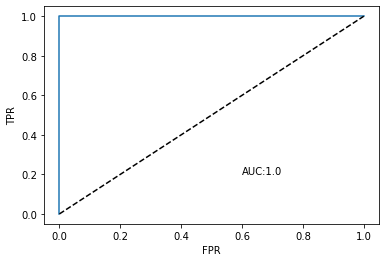

In [18]:
## Construct the ROC and the AUC
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
auc = np.round(roc_auc_score(test_labels, y_pred),3)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.text(0.6,0.2, "AUC:"+str(auc));

## Today

* We are going to use SVM with real data. We are going to use the linear kernel again, but you can change to RBF (it will take much longer to run).
* We are also going to introduce hyper-parameter optimization and grid searching (again takes more time)

In the construction of the SVM: `cls = svm.SVC(kernel="linear", C=10)`, `C` is a hyperparameter that we can adjust. `sklearn` has a mechanism to do this automatically via a search and find the "best" choice: `GridSearchCV`.

**Please ask lots of questions about what the code is doing today because you are not writing a lot of code today!**

# Questions, Comments, Concerns?